In [112]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [113]:
import pandas as pd
#dataset imported using pandas
data=pd.read_csv("/content/raw_practo.csv")
df = pd.DataFrame(data)
df.head()

Name              Speciality Degree  \
0  Ms. Priyanka Wincy R  Dietitian/Nutritionist  B.Sc.   
1     Ms. Neha Ranglani  Dietitian/Nutritionist  B.Sc.   
2     Ms. Sonal Bhosale  Dietitian/Nutritionist  B.Sc.   
3     Ms. Silky Mahajan  Dietitian/Nutritionist  B.Sc.   
4  Ms. Twincy Ann Sunil  Dietitian/Nutritionist  B.Sc.   

                                  Year_of_experience  \
0                         4 Years Experience Overall   
1  14 Years Experience Overall  (13 years as spec...   
2  16 Years Experience Overall  (10 years as spec...   
3                        15 Years Experience Overall   
4                          1 Year Experience Overall   

                         Location       City dp_score          npv  \
0  Koramangala 7 Block, Bangalore  Bangalore     100%   (40 votes)   
1             Bandra West, Mumbai     Mumbai      96%  (222 votes)   
2          Kandivali West, Mumbai     Mumbai      99%   (96 votes)   
3  Koramangala 3 Block, Bangalore  Bangalore      97%  (270 votes)   
4  Koramangala 5 Block, Bangalore  Bangalore      99%  (121 votes)   

  consultation_fee  
0        ₹ 600 fee  
1       ₹ 2500 fee  
2          ₹ 0 fee  
3       ₹ 1770 fee  
4        ₹ 600 fee

In [114]:
df.info()
#data cleaning no null values present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6001 entries, 0 to 6000
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                6001 non-null   object
 1   Speciality          6001 non-null   object
 2   Degree              6001 non-null   object
 3   Year_of_experience  6001 non-null   object
 4   Location            6001 non-null   object
 5   City                6001 non-null   object
 6   dp_score            6001 non-null   object
 7   npv                 6001 non-null   object
 8   consultation_fee    6001 non-null   object
dtypes: object(9)
memory usage: 422.1+ KB


In [115]:
df.shape

(6001, 9)

In [116]:
df.duplicated().sum()

6

In [117]:
df.drop_duplicates(inplace=True)

In [118]:
print(pd.isna(df))
df.info()

       Name  Speciality  Degree  Year_of_experience  Location   City  \
0     False       False   False               False     False  False   
1     False       False   False               False     False  False   
2     False       False   False               False     False  False   
3     False       False   False               False     False  False   
4     False       False   False               False     False  False   
...     ...         ...     ...                 ...       ...    ...   
5996  False       False   False               False     False  False   
5997  False       False   False               False     False  False   
5998  False       False   False               False     False  False   
5999  False       False   False               False     False  False   
6000  False       False   False               False     False  False   

      dp_score    npv  consultation_fee  
0        False  False             False  
1        False  False             False  
2        

In [119]:
df["consultation_fee"]=df["consultation_fee"].str.replace('₹','')
df["consultation_fee"]=df["consultation_fee"].str.replace('fee','')
df['consultation_fee']=pd.to_numeric(df["consultation_fee"])
df.head()

Name              Speciality Degree  \
0  Ms. Priyanka Wincy R  Dietitian/Nutritionist  B.Sc.   
1     Ms. Neha Ranglani  Dietitian/Nutritionist  B.Sc.   
2     Ms. Sonal Bhosale  Dietitian/Nutritionist  B.Sc.   
3     Ms. Silky Mahajan  Dietitian/Nutritionist  B.Sc.   
4  Ms. Twincy Ann Sunil  Dietitian/Nutritionist  B.Sc.   

                                  Year_of_experience  \
0                         4 Years Experience Overall   
1  14 Years Experience Overall  (13 years as spec...   
2  16 Years Experience Overall  (10 years as spec...   
3                        15 Years Experience Overall   
4                          1 Year Experience Overall   

                         Location       City dp_score          npv  \
0  Koramangala 7 Block, Bangalore  Bangalore     100%   (40 votes)   
1             Bandra West, Mumbai     Mumbai      96%  (222 votes)   
2          Kandivali West, Mumbai     Mumbai      99%   (96 votes)   
3  Koramangala 3 Block, Bangalore  Bangalore      97%  (270 votes)   
4  Koramangala 5 Block, Bangalore  Bangalore      99%  (121 votes)   

   consultation_fee  
0               600  
1              2500  
2                 0  
3              1770  
4               600

In [120]:
df['Year_of_experience']=df['Year_of_experience'].replace('[^0-9]',' ',regex=True).\
str.strip().str.split(expand=True)[0].astype(float)
df.head()

Name              Speciality Degree  Year_of_experience  \
0  Ms. Priyanka Wincy R  Dietitian/Nutritionist  B.Sc.                 4.0   
1     Ms. Neha Ranglani  Dietitian/Nutritionist  B.Sc.                14.0   
2     Ms. Sonal Bhosale  Dietitian/Nutritionist  B.Sc.                16.0   
3     Ms. Silky Mahajan  Dietitian/Nutritionist  B.Sc.                15.0   
4  Ms. Twincy Ann Sunil  Dietitian/Nutritionist  B.Sc.                 1.0   

                         Location       City dp_score          npv  \
0  Koramangala 7 Block, Bangalore  Bangalore     100%   (40 votes)   
1             Bandra West, Mumbai     Mumbai      96%  (222 votes)   
2          Kandivali West, Mumbai     Mumbai      99%   (96 votes)   
3  Koramangala 3 Block, Bangalore  Bangalore      97%  (270 votes)   
4  Koramangala 5 Block, Bangalore  Bangalore      99%  (121 votes)   

   consultation_fee  
0               600  
1              2500  
2                 0  
3              1770  
4               600

In [121]:
df['npv']=df['npv'].replace("[^0-9]",'',regex=True).astype(int)
df.head()

Name              Speciality Degree  Year_of_experience  \
0  Ms. Priyanka Wincy R  Dietitian/Nutritionist  B.Sc.                 4.0   
1     Ms. Neha Ranglani  Dietitian/Nutritionist  B.Sc.                14.0   
2     Ms. Sonal Bhosale  Dietitian/Nutritionist  B.Sc.                16.0   
3     Ms. Silky Mahajan  Dietitian/Nutritionist  B.Sc.                15.0   
4  Ms. Twincy Ann Sunil  Dietitian/Nutritionist  B.Sc.                 1.0   

                         Location       City dp_score  npv  consultation_fee  
0  Koramangala 7 Block, Bangalore  Bangalore     100%   40               600  
1             Bandra West, Mumbai     Mumbai      96%  222              2500  
2          Kandivali West, Mumbai     Mumbai      99%   96                 0  
3  Koramangala 3 Block, Bangalore  Bangalore      97%  270              1770  
4  Koramangala 5 Block, Bangalore  Bangalore      99%  121               600

In [122]:
df['dp_score']=df['dp_score'].replace("[^0-9]",'',regex=True).astype(int)
df.head()

Name              Speciality Degree  Year_of_experience  \
0  Ms. Priyanka Wincy R  Dietitian/Nutritionist  B.Sc.                 4.0   
1     Ms. Neha Ranglani  Dietitian/Nutritionist  B.Sc.                14.0   
2     Ms. Sonal Bhosale  Dietitian/Nutritionist  B.Sc.                16.0   
3     Ms. Silky Mahajan  Dietitian/Nutritionist  B.Sc.                15.0   
4  Ms. Twincy Ann Sunil  Dietitian/Nutritionist  B.Sc.                 1.0   

                         Location       City  dp_score  npv  consultation_fee  
0  Koramangala 7 Block, Bangalore  Bangalore       100   40               600  
1             Bandra West, Mumbai     Mumbai        96  222              2500  
2          Kandivali West, Mumbai     Mumbai        99   96                 0  
3  Koramangala 3 Block, Bangalore  Bangalore        97  270              1770  
4  Koramangala 5 Block, Bangalore  Bangalore        99  121               600

In [123]:
df[['Location', 'ABC']] = df['Location'].str.split(',', expand=True)
df.drop('ABC',axis=1,inplace=True)
df.head()

Name              Speciality Degree  Year_of_experience  \
0  Ms. Priyanka Wincy R  Dietitian/Nutritionist  B.Sc.                 4.0   
1     Ms. Neha Ranglani  Dietitian/Nutritionist  B.Sc.                14.0   
2     Ms. Sonal Bhosale  Dietitian/Nutritionist  B.Sc.                16.0   
3     Ms. Silky Mahajan  Dietitian/Nutritionist  B.Sc.                15.0   
4  Ms. Twincy Ann Sunil  Dietitian/Nutritionist  B.Sc.                 1.0   

              Location       City  dp_score  npv  consultation_fee  
0  Koramangala 7 Block  Bangalore       100   40               600  
1          Bandra West     Mumbai        96  222              2500  
2       Kandivali West     Mumbai        99   96                 0  
3  Koramangala 3 Block  Bangalore        97  270              1770  
4  Koramangala 5 Block  Bangalore        99  121               600

In [124]:
df=df.dropna()
df['Year_of_experience']=df['Year_of_experience'].astype(int)
df.dtypes

<ipython-input-124-8de0705a4ef6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_of_experience']=df['Year_of_experience'].astype(int)


Name                  object
Speciality            object
Degree                object
Year_of_experience     int64
Location              object
City                  object
dp_score               int64
npv                    int64
consultation_fee       int64
dtype: object

In [125]:
df['npv(votes)']=df['npv']
df.drop('npv',axis=1,inplace=True)
df.head()

Name              Speciality Degree  Year_of_experience  \
0  Ms. Priyanka Wincy R  Dietitian/Nutritionist  B.Sc.                   4   
1     Ms. Neha Ranglani  Dietitian/Nutritionist  B.Sc.                  14   
2     Ms. Sonal Bhosale  Dietitian/Nutritionist  B.Sc.                  16   
3     Ms. Silky Mahajan  Dietitian/Nutritionist  B.Sc.                  15   
4  Ms. Twincy Ann Sunil  Dietitian/Nutritionist  B.Sc.                   1   

              Location       City  dp_score  consultation_fee  npv(votes)  
0  Koramangala 7 Block  Bangalore       100               600          40  
1          Bandra West     Mumbai        96              2500         222  
2       Kandivali West     Mumbai        99                 0          96  
3  Koramangala 3 Block  Bangalore        97              1770         270  
4  Koramangala 5 Block  Bangalore        99               600         121

In [126]:
df['Degree_']=df['Degree'].str.split(expand=True)[0]
df['Degree_']=df['Degree_'].str.replace("[^a-zA-Z/]",'',regex=True)
df['Degree_'].unique()

array(['BSc', 'BAMS', 'BDS', 'MDS', 'PhD', 'BHMS', 'BNYS', 'BPTh/BPT',
       'MPTh/MPT', 'MPT/MPTh', 'MSc', 'DDVL', 'DGO', 'DNB', 'MD',
       'Diploma', 'MBBS', 'DDPHN', 'DDHN', 'DM', 'DNHE', 'DO', 'Doctor',
       'Doctorate', 'DOMS', 'DPM', 'DVD', 'FCPS', 'Fellow', 'Fellowship',
       'FNB', 'FRCP', 'FRCS', 'Masters', 'MCh', 'Member', 'MRCOGUK',
       'MRCS', 'MS', 'PG', 'PGD', 'Post'], dtype=object)

In [127]:
df['Degree_'].replace('DO','Doctorate',inplace=True)
df['Degree_'].replace('Doctor','Doctorate',inplace=True)
df['Degree_'].replace('Post','PG',inplace=True)
remove = ['FNB', 'Fellow', 'DVD', 'Member', 'MRCOGUK', 'MRCS', 'DNHE','Fellowship','Masters']
df = df[~df['Degree_'].isin(remove)]
# df['Dgree-1'].value_counts().tail(8)
df['Degree_'].unique()

array(['BSc', 'BAMS', 'BDS', 'MDS', 'PhD', 'BHMS', 'BNYS', 'BPTh/BPT',
       'MPTh/MPT', 'MPT/MPTh', 'MSc', 'DDVL', 'DGO', 'DNB', 'MD',
       'Diploma', 'MBBS', 'DDPHN', 'DDHN', 'DM', 'Doctorate', 'DOMS',
       'DPM', 'FCPS', 'FRCP', 'FRCS', 'MCh', 'MS', 'PG', 'PGD'],
      dtype=object)

In [128]:
df.drop('Degree',axis=1,inplace=True)
df.rename(columns={'Degree_': 'Degree'}, inplace=True)
df.head()

<ipython-input-128-d89fb0307b06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Degree',axis=1,inplace=True)
<ipython-input-128-d89fb0307b06>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Degree_': 'Degree'}, inplace=True)


Name              Speciality  Year_of_experience  \
0  Ms. Priyanka Wincy R  Dietitian/Nutritionist                   4   
1     Ms. Neha Ranglani  Dietitian/Nutritionist                  14   
2     Ms. Sonal Bhosale  Dietitian/Nutritionist                  16   
3     Ms. Silky Mahajan  Dietitian/Nutritionist                  15   
4  Ms. Twincy Ann Sunil  Dietitian/Nutritionist                   1   

              Location       City  dp_score  consultation_fee  npv(votes)  \
0  Koramangala 7 Block  Bangalore       100               600          40   
1          Bandra West     Mumbai        96              2500         222   
2       Kandivali West     Mumbai        99                 0          96   
3  Koramangala 3 Block  Bangalore        97              1770         270   
4  Koramangala 5 Block  Bangalore        99               600         121   

  Degree  
0    BSc  
1    BSc  
2    BSc  
3    BSc  
4    BSc

In [129]:
df['Degree'].replace('DO','Doctorate',inplace=True)
df['Degree'].replace('Doctor','Doctorate',inplace=True)
df['Degree'].replace('Post','PG',inplace=True)
df.head()

<ipython-input-129-310f36698c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Degree'].replace('DO','Doctorate',inplace=True)
<ipython-input-129-310f36698c18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Degree'].replace('Doctor','Doctorate',inplace=True)
<ipython-input-129-310f36698c18>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Degree'].replace('Post','PG',inplace=True)


Name              Speciality  Year_of_experience  \
0  Ms. Priyanka Wincy R  Dietitian/Nutritionist                   4   
1     Ms. Neha Ranglani  Dietitian/Nutritionist                  14   
2     Ms. Sonal Bhosale  Dietitian/Nutritionist                  16   
3     Ms. Silky Mahajan  Dietitian/Nutritionist                  15   
4  Ms. Twincy Ann Sunil  Dietitian/Nutritionist                   1   

              Location       City  dp_score  consultation_fee  npv(votes)  \
0  Koramangala 7 Block  Bangalore       100               600          40   
1          Bandra West     Mumbai        96              2500         222   
2       Kandivali West     Mumbai        99                 0          96   
3  Koramangala 3 Block  Bangalore        97              1770         270   
4  Koramangala 5 Block  Bangalore        99               600         121   

  Degree  
0    BSc  
1    BSc  
2    BSc  
3    BSc  
4    BSc

In [130]:
df['Degree'].unique()

array(['BSc', 'BAMS', 'BDS', 'MDS', 'PhD', 'BHMS', 'BNYS', 'BPTh/BPT',
       'MPTh/MPT', 'MPT/MPTh', 'MSc', 'DDVL', 'DGO', 'DNB', 'MD',
       'Diploma', 'MBBS', 'DDPHN', 'DDHN', 'DM', 'Doctorate', 'DOMS',
       'DPM', 'FCPS', 'FRCP', 'FRCS', 'MCh', 'MS', 'PG', 'PGD'],
      dtype=object)

In [131]:
df.dtypes
df

Name              Speciality  Year_of_experience  \
0        Ms. Priyanka Wincy R  Dietitian/Nutritionist                   4   
1           Ms. Neha Ranglani  Dietitian/Nutritionist                  14   
2           Ms. Sonal Bhosale  Dietitian/Nutritionist                  16   
3           Ms. Silky Mahajan  Dietitian/Nutritionist                  15   
4        Ms. Twincy Ann Sunil  Dietitian/Nutritionist                   1   
...                       ...                     ...                 ...   
5996  Ms. Swarn Shikha Sharma  Dietitian/Nutritionist                  17   
5997  Ms. Meghna Parekh Sheth  Dietitian/Nutritionist                  26   
5998         Ms. Shweta Uchil  Dietitian/Nutritionist                  24   
5999      Ms. Pallavi Larecha  Dietitian/Nutritionist                  13   
6000          Ms. Ushma Haria  Dietitian/Nutritionist                  14   

                    Location       City  dp_score  consultation_fee  \
0        Koramangala 7 Block  Bangalore       100               600   
1                Bandra West     Mumbai        96              2500   
2             Kandivali West     Mumbai        99                 0   
3        Koramangala 3 Block  Bangalore        97              1770   
4        Koramangala 5 Block  Bangalore        99               600   
...                      ...        ...       ...               ...   
5996  Greater Kailash Part 1      Delhi        97               300   
5997          Kandivali West     Mumbai        96               500   
5998          Kandivali West     Mumbai        93                 0   
5999           Shalimar Bagh      Delhi        92               450   
6000            Chembur East     Mumbai        99               800   

      npv(votes) Degree  
0             40    BSc  
1            222    BSc  
2             96    BSc  
3            270    BSc  
4            121    BSc  
...          ...    ...  
5996          34     PG  
5997         168     PG  
5998          15     PG  
5999          37     PG  
6000          83     PG  

[5970 rows x 9 columns]

EDA

In [132]:
df.describe()

Year_of_experience     dp_score  consultation_fee   npv(votes)
count         5970.000000  5970.000000       5970.000000  5970.000000
mean            19.351089    94.156616        843.625628   176.711558
std              9.847983     8.983432        490.154932   371.934703
min              1.000000    18.000000          0.000000    11.000000
25%             12.000000    93.000000        500.000000    25.000000
50%             17.000000    97.000000        750.000000    60.000000
75%             24.000000   100.000000       1000.000000   170.000000
max             64.000000   100.000000       5000.000000  8235.000000

In [133]:
x=df.groupby('City').agg({'Speciality':'count'}).sort_values(by='Speciality',ascending=False).reset_index()
x

City  Speciality
0  Bangalore        2808
1      Delhi        1786
2     Mumbai        1376

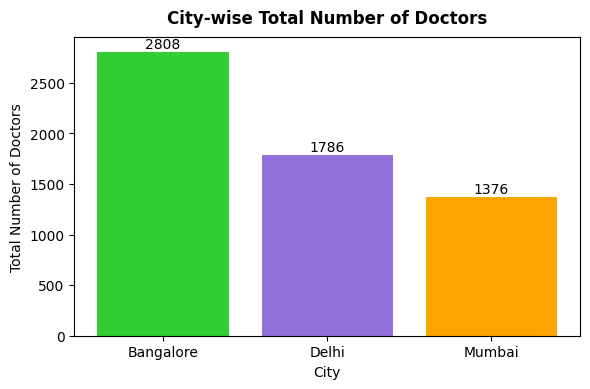

In [134]:
cities = ['Bangalore', 'Delhi', 'Mumbai']
values = x['Speciality']

colors = ['#32CD32', '#9370DB', '#FFA500']

plt.figure(figsize=(6, 4))
bars = plt.bar(cities, values, color=colors,data=x)

#Data labels
for bar, value in zip(bars, values):
    plt.annotate(str(value), (bar.get_x() + bar.get_width() / 2, bar.get_height() + 5),
                 ha='center', va='bottom')

plt.xlabel('City')
plt.ylabel('Total Number of Doctors')
plt.title('City-wise Total Number of Doctors', y=1.02, fontsize=12,fontweight='bold')

plt.tight_layout()
plt.show()

In [135]:
x=df.groupby('Degree').agg({'City':'count'}).sort_values(by='City',ascending=False).head(5)
x

City
Degree        
MBBS      3362
MDS        873
BDS        712
MD         203
BPTh/BPT   169

In [136]:
cities = ['Delhi', 'Mumbai', 'Bangalore']

result = {}

for city in cities:
    city_df = df[df['City'] == city]
    x_city = city_df.groupby('Degree').agg({'City': 'count'}).sort_values(by='City', ascending=False).head(5)
    result[city] = x_city
result['Delhi']
# The result dictionary contains the top 5 degrees for each city

City
Degree      
MBBS    1121
MDS      225
BDS      157
MD        74
MS        37

In [137]:
result['Mumbai']

City
Degree        
MBBS       547
BDS        255
MDS        211
MD          66
BPTh/BPT    64

In [138]:
result['Bangalore']

City
Degree        
MBBS      1694
MDS        437
BDS        300
BPTh/BPT    79
MS          65

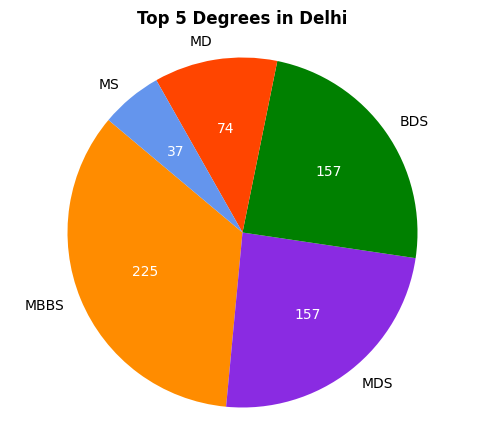

In [139]:
# Top 5 degrees in Delhi
categories = ['MBBS','MDS','BDS','MD','MS']
values = [225, 157, 157, 74, 37]

colors = ['#FF8C00', '#8A2BE2', '#008000', '#FF4500', '#6495ED']

plt.figure(figsize=(6, 5))
wedges, texts, autotexts = plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors,data=x)

for i, (wedge, text, autotext) in enumerate(zip(wedges, texts, autotexts)):
    autotext.set_text(f'{values[i]}')
    autotext.set_color('white')

plt.title('Top 5 Degrees in Delhi', y=1.02, fontsize=12,fontweight='bold')
plt.axis('equal')
plt.show()

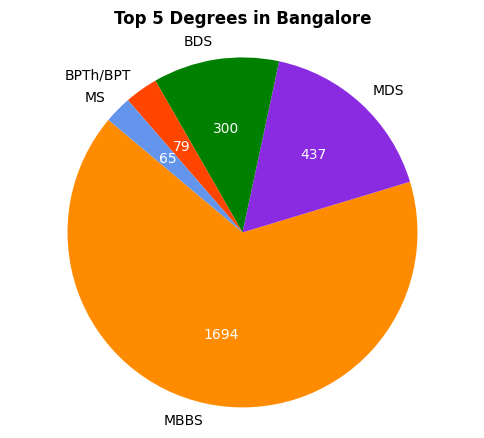

In [140]:
# Top 5 degrees in Bangalore
categories = ['MBBS','MDS','BDS','BPTh/BPT','MS']
values = [1694, 437, 300, 79, 65]

colors = ['#FF8C00', '#8A2BE2', '#008000', '#FF4500', '#6495ED']

plt.figure(figsize=(6, 5))
wedges, texts, autotexts = plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors,data=x)

for i, (wedge, text, autotext) in enumerate(zip(wedges, texts, autotexts)):
    autotext.set_text(f'{values[i]}')
    autotext.set_color('white')

plt.title('Top 5 Degrees in Bangalore', y=1.02, fontsize=12,fontweight='bold')
plt.axis('equal')
plt.show()

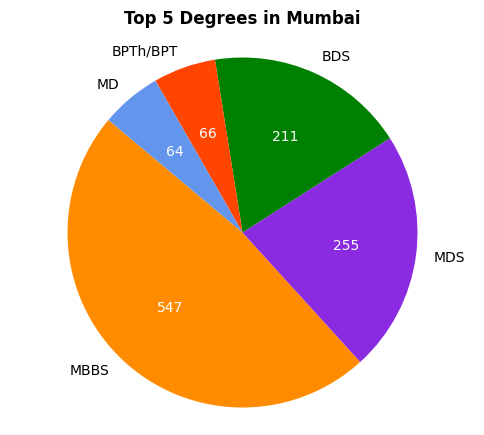

In [141]:
# Top 5 degrees in Mumbai
categories = ['MBBS','MDS','BDS','BPTh/BPT','MD']
values = [547, 255, 211, 66, 64]

colors = ['#FF8C00', '#8A2BE2', '#008000', '#FF4500', '#6495ED']

plt.figure(figsize=(6, 5))
wedges, texts, autotexts = plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors,data=x)

for i, (wedge, text, autotext) in enumerate(zip(wedges, texts, autotexts)):
    autotext.set_text(f'{values[i]}')
    autotext.set_color('white')

plt.title('Top 5 Degrees in Mumbai', y=1.02, fontsize=12,fontweight='bold')
plt.axis('equal')
plt.show()

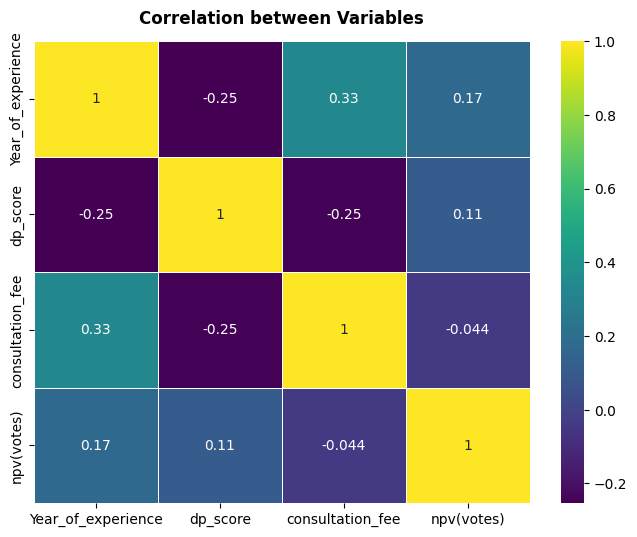

In [142]:
# Correlation between Year_of_experience','dp_score','consultation_fee','npv(votes) of all 3 cities
plt.figure(figsize=(8, 6))
df2= df[['Year_of_experience','dp_score','consultation_fee','npv(votes)']]
sns.heatmap(df2.corr(method='spearman'), annot=True, cmap="viridis", linewidths=0.5)
plt.title('Correlation between Variables',y=1.02, fontsize=12,fontweight='bold')
plt.show()

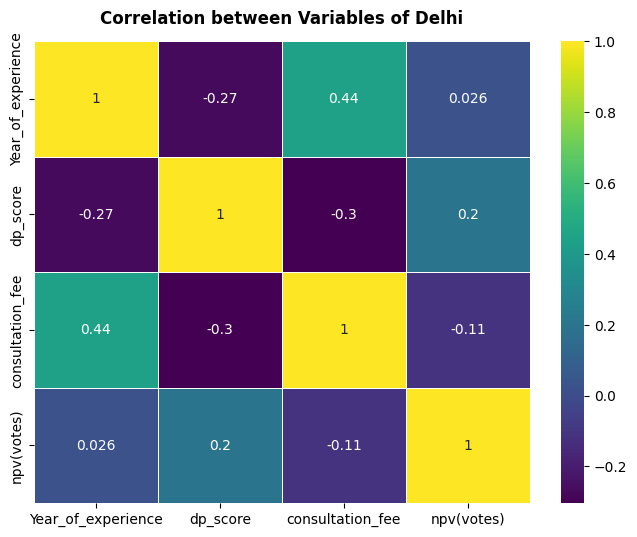

In [143]:
# Correlation between Year_of_experience','dp_score','consultation_fee','npv(votes) of Delhi
grouped = df.groupby(df.City)
df_del = grouped.get_group("Delhi")
df_del
plt.figure(figsize=(8, 6))
df2= df_del[['Year_of_experience','dp_score','consultation_fee','npv(votes)']]
sns.heatmap(df2.corr(method='spearman'), annot=True, cmap="viridis", linewidths=0.5)
plt.title('Correlation between Variables of Delhi',y=1.02, fontsize=12,fontweight='bold')
plt.show()

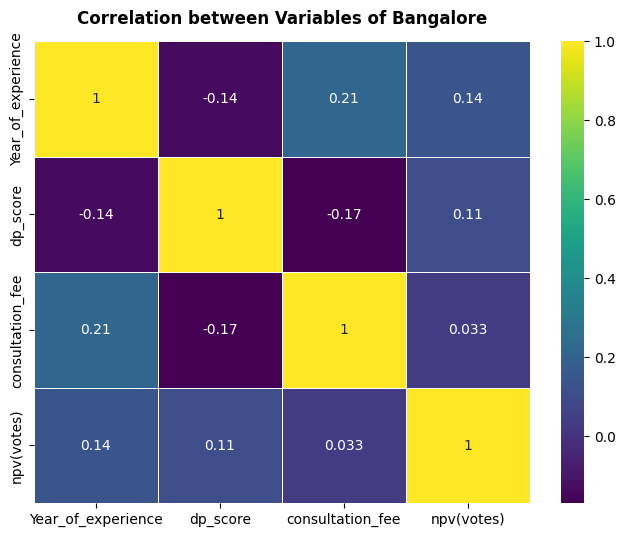

In [144]:
# Correlation between Year_of_experience','dp_score','consultation_fee','npv(votes) of Bangalore
grouped = df.groupby(df.City)
df_ben = grouped.get_group("Bangalore")
df_ben
plt.figure(figsize=(8, 6))
df2= df_ben[['Year_of_experience','dp_score','consultation_fee','npv(votes)']]
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap="viridis", linewidths=0.5)
plt.title('Correlation between Variables of Bangalore',y=1.02, fontsize=12,fontweight='bold')
plt.show()

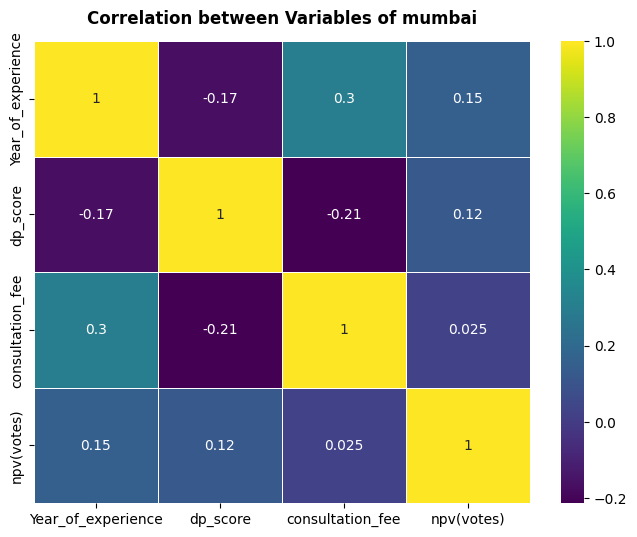

In [145]:
# Correlation between Year_of_experience','dp_score','consultation_fee','npv(votes) of mumbai
grouped = df.groupby(df.City)
df_mum= grouped.get_group("Mumbai")
df_mum
plt.figure(figsize=(8, 6))
df2= df_mum[['Year_of_experience','dp_score','consultation_fee','npv(votes)']]
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap="viridis", linewidths=0.5)
plt.title('Correlation between Variables of mumbai',y=1.02, fontsize=12,fontweight='bold')
plt.show()

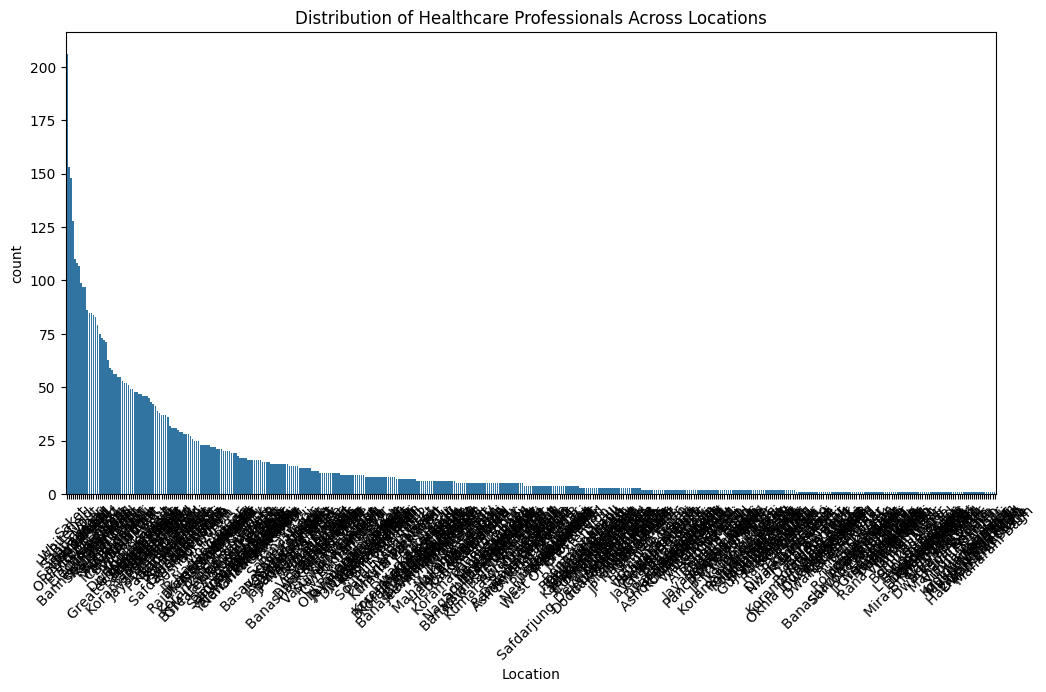

In [146]:
# Geographic Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Location', data=df, order=df['Location'].value_counts().index)
plt.title('Distribution of Healthcare Professionals Across Locations')
plt.xticks(rotation=45)
plt.show()

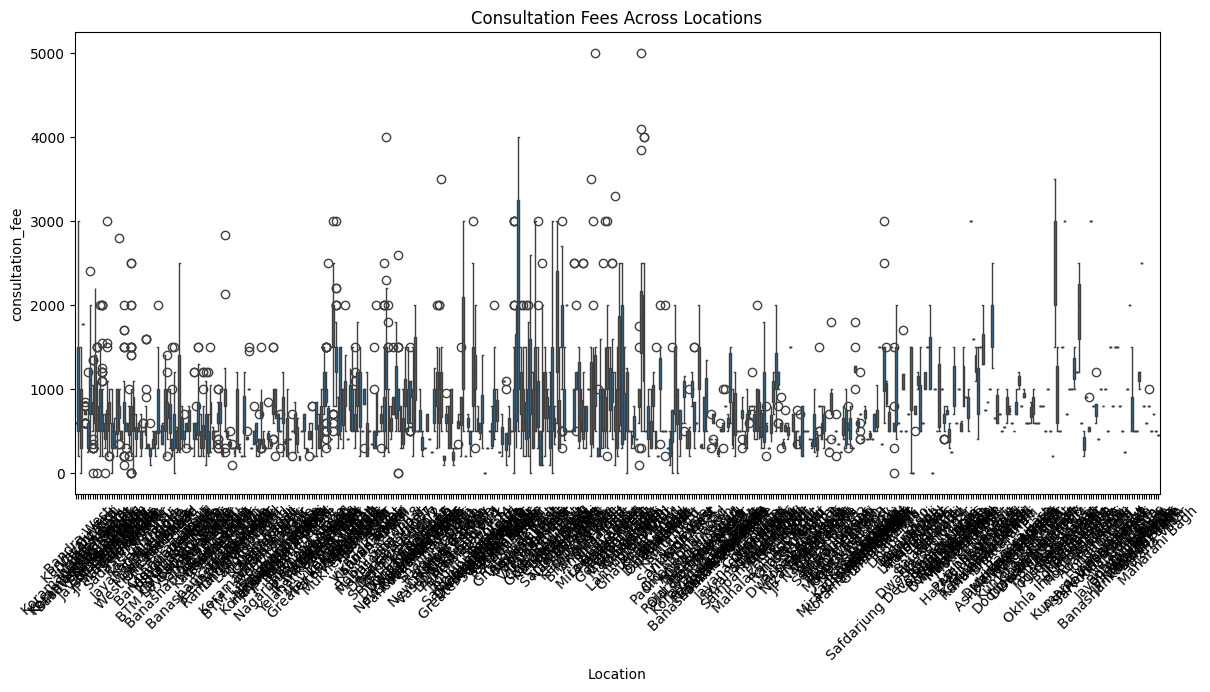

In [147]:
# 3. Consultation Fees by Location
plt.figure(figsize=(14, 6))
sns.boxplot(x='Location', y='consultation_fee', data=df)
plt.title('Consultation Fees Across Locations')
plt.xticks(rotation=45)
plt.show()

In [148]:
grouped = df.groupby(df.City)
df_del = grouped.get_group("Delhi")
df_del

Name              Speciality  Year_of_experience  \
6        Dr. Sunita Choudhary  Dietitian/Nutritionist                  15   
8         Dr. Praveen Rustagi  Dietitian/Nutritionist                  27   
9         Dr. Sugeeta Mutreja  Dietitian/Nutritionist                  23   
10           Dr. Anjana Kalia  Dietitian/Nutritionist                  22   
11                 Dr. Shilpa  Dietitian/Nutritionist                  19   
...                       ...                     ...                 ...   
5969      Ms. Ritika Samaddar  Dietitian/Nutritionist                  24   
5974        Ms. Nidhi Sawhney  Dietitian/Nutritionist                   6   
5982         Ms. Monika Arora  Dietitian/Nutritionist                  20   
5996  Ms. Swarn Shikha Sharma  Dietitian/Nutritionist                  17   
5999      Ms. Pallavi Larecha  Dietitian/Nutritionist                  13   

                    Location   City  dp_score  consultation_fee  npv(votes)  \
6                Vasant Kunj  Delhi        99               300        1589   
8              Malviya Nagar  Delhi        96               500         113   
9                     Dwarka  Delhi        99              1000         289   
10                    Dwarka  Delhi        99              1000         164   
11                 Pitampura  Delhi        96               500         256   
...                      ...    ...       ...               ...         ...   
5969                   Saket  Delhi        89              1000          18   
5974           Gulmohar Park  Delhi        99              1500         814   
5982             Karkardooma  Delhi       100               700          12   
5996  Greater Kailash Part 1  Delhi        97               300          34   
5999           Shalimar Bagh  Delhi        92               450          37   

     Degree  
6      BAMS  
8      BAMS  
9      BAMS  
10     BAMS  
11     BAMS  
...     ...  
5969    MSc  
5974    PGD  
5982     PG  
5996     PG  
5999     PG  

[1786 rows x 9 columns]

In [149]:
df_bl = grouped.get_group("Bangalore")
df_bl

Name              Speciality  \
0                   Ms. Priyanka Wincy R  Dietitian/Nutritionist   
3                      Ms. Silky Mahajan  Dietitian/Nutritionist   
4                   Ms. Twincy Ann Sunil  Dietitian/Nutritionist   
5     Dr. Keerthi Shree Kirisave   (PhD)  Dietitian/Nutritionist   
7                   Dr. Sharmila Shankar  Dietitian/Nutritionist   
...                                  ...                     ...   
5962                 Ms. Nafeesa Imteyaz  Dietitian/Nutritionist   
5963                     Ms. Ritu Kapoor  Dietitian/Nutritionist   
5967                 Ms. Phebe Vinodhini  Dietitian/Nutritionist   
5978            Dr. Shailja Jain   (PhD)  Dietitian/Nutritionist   
5986                        Dr. Geetha B  Dietitian/Nutritionist   

      Year_of_experience             Location       City  dp_score  \
0                      4  Koramangala 7 Block  Bangalore       100   
3                     15  Koramangala 3 Block  Bangalore        97   
4                      1  Koramangala 5 Block  Bangalore        99   
5                     14    Basaveshwaranagar  Bangalore        97   
7                     23          Malleswaram  Bangalore       100   
...                  ...                  ...        ...       ...   
5962                  28          Indiranagar  Bangalore        98   
5963                   2        Kasavanahalli  Bangalore       100   
5967                  11  Koramangala 5 Block  Bangalore       100   
5978                  18           Whitefield  Bangalore        95   
5986                  38    Basaveshwaranagar  Bangalore       100   

      consultation_fee  npv(votes) Degree  
0                  600          40    BSc  
3                 1770         270    BSc  
4                  600         121    BSc  
5                  850         117    BSc  
7                 1000         106   BAMS  
...                ...         ...    ...  
5962              1000        3683    MSc  
5963               800          34    MSc  
5967               700          50    MSc  
5978              1500         487    PhD  
5986               250          34     PG  

[2808 rows x 9 columns]

In [150]:
df_mum = grouped.get_group("Mumbai")
df_mum


Name              Speciality  Year_of_experience  \
1             Ms. Neha Ranglani  Dietitian/Nutritionist                  14   
2             Ms. Sonal Bhosale  Dietitian/Nutritionist                  16   
443         Dr. Manish Kachhara                 Dentist                  21   
444            Dr. Sanket Mehta                 Dentist                  18   
445           Dr. Manisha Mehta                 Dentist                  17   
...                         ...                     ...                 ...   
5994  Ms. Dt Ruchita Maheshwari  Dietitian/Nutritionist                  11   
5995         Ms. Mansi Padechia  Dietitian/Nutritionist                  13   
5997    Ms. Meghna Parekh Sheth  Dietitian/Nutritionist                  26   
5998           Ms. Shweta Uchil  Dietitian/Nutritionist                  24   
6000            Ms. Ushma Haria  Dietitian/Nutritionist                  14   

            Location    City  dp_score  consultation_fee  npv(votes) Degree  
1        Bandra West  Mumbai        96              2500         222    BSc  
2     Kandivali West  Mumbai        99                 0          96    BSc  
443   Ghatkopar East  Mumbai        99               500         363    BDS  
444          Matunga  Mumbai        99               500         924    BDS  
445            Worli  Mumbai        98               500        1003    BDS  
...              ...     ...       ...               ...         ...    ...  
5994    Andheri East  Mumbai        94               850          34     PG  
5995          Tardeo  Mumbai        99              2000         232     PG  
5997  Kandivali West  Mumbai        96               500         168     PG  
5998  Kandivali West  Mumbai        93                 0          15     PG  
6000    Chembur East  Mumbai        99               800          83     PG  

[1376 rows x 9 columns]

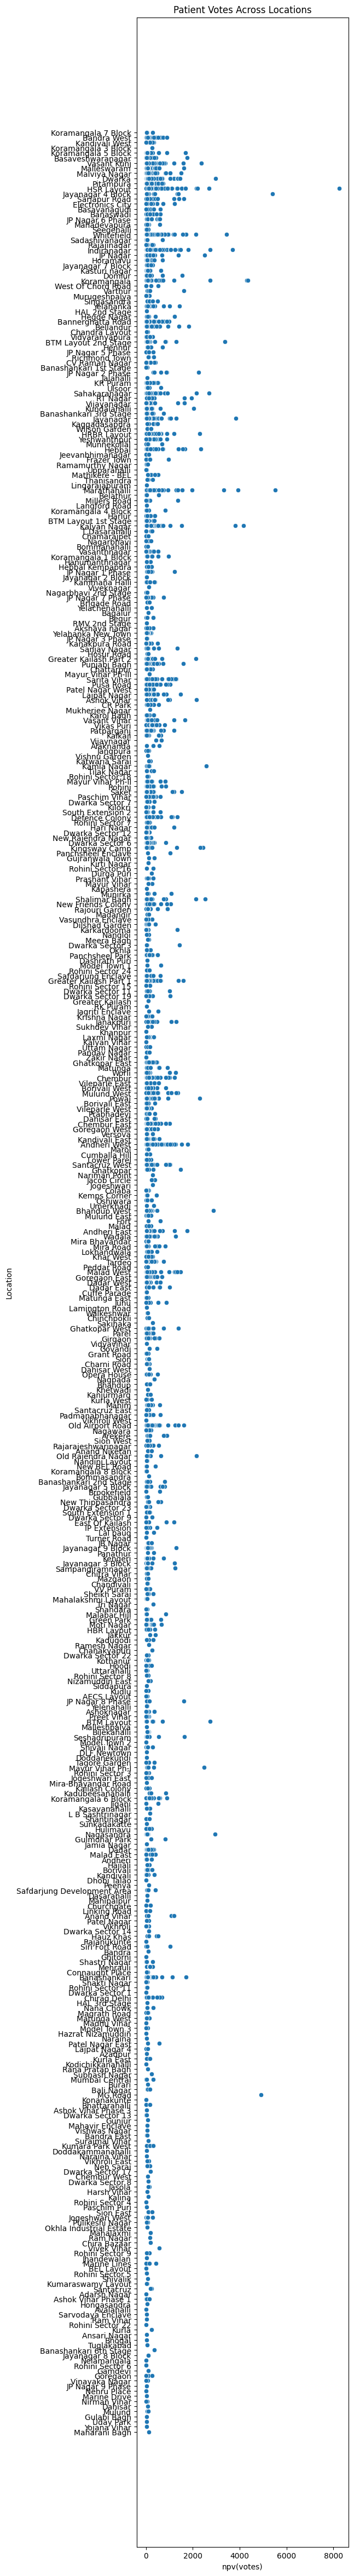

In [152]:
# 7. Patient Votes Analysis
plt.figure(figsize=(5, 60))
sns.scatterplot(x='npv(votes)', y='Location', data=df)
plt.title('Patient Votes Across Locations')
plt.show()

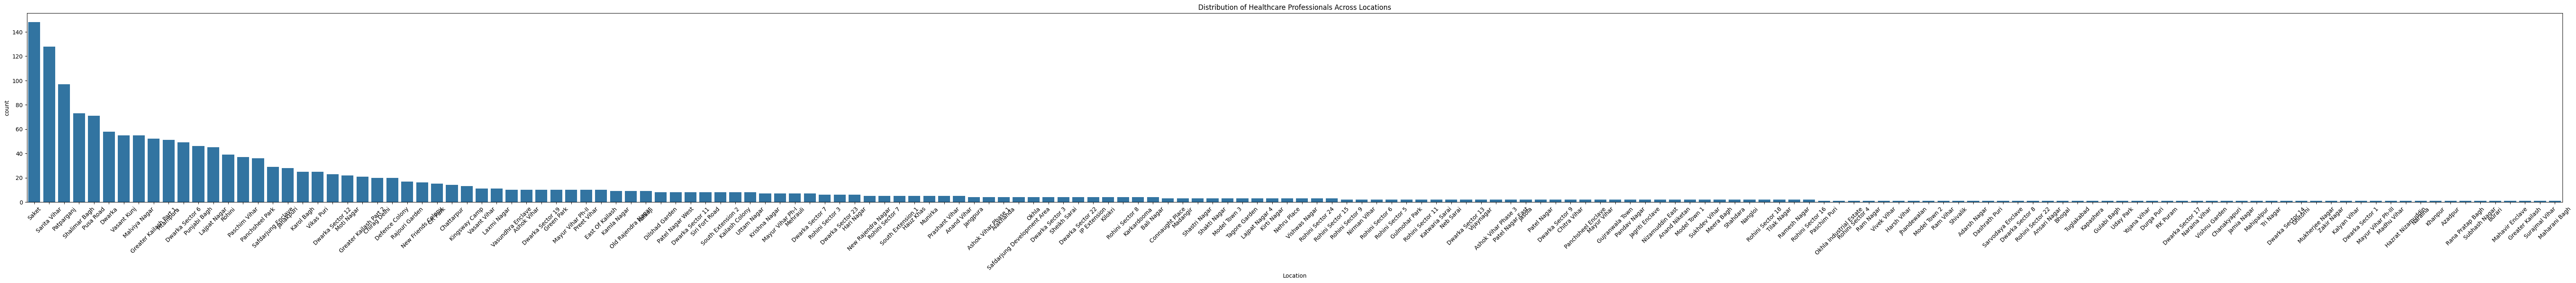

In [153]:
# Geographic Distribution for delhi
plt.figure(figsize=(80, 6))
sns.countplot(x='Location', data=df_del, order=df_del['Location'].value_counts().index)
plt.title('Distribution of Healthcare Professionals Across Locations')
plt.xticks(rotation=45)
plt.show()

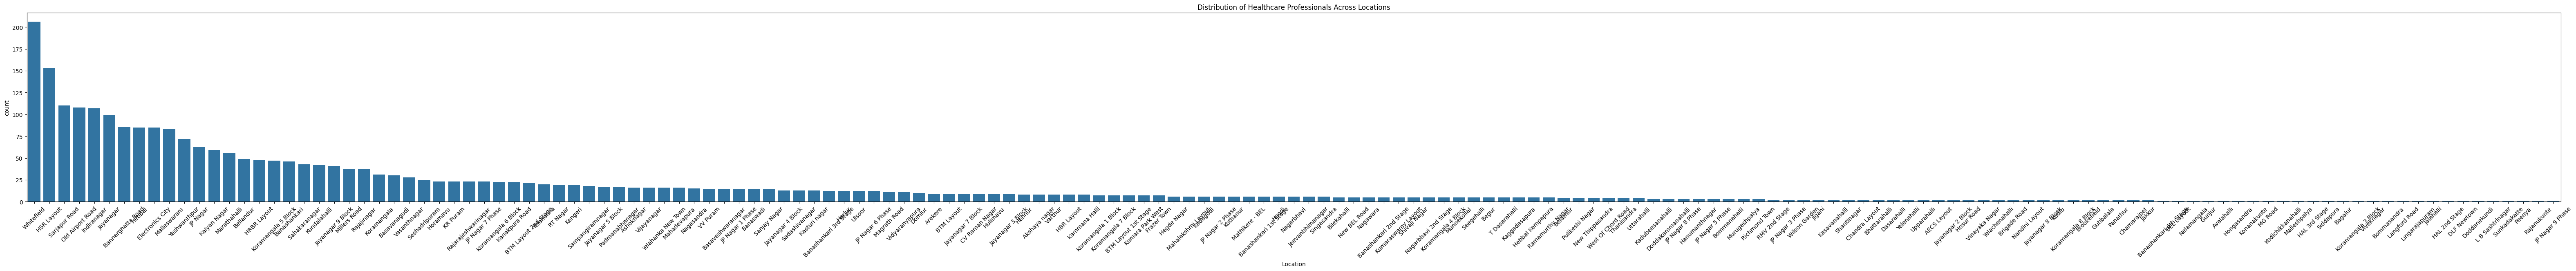

In [154]:
# Geographic Distribution for bangalore
plt.figure(figsize=(80, 6))
sns.countplot(x='Location', data=df_bl, order=df_bl['Location'].value_counts().index)
plt.title('Distribution of Healthcare Professionals Across Locations')
plt.xticks(rotation=45)
plt.show()

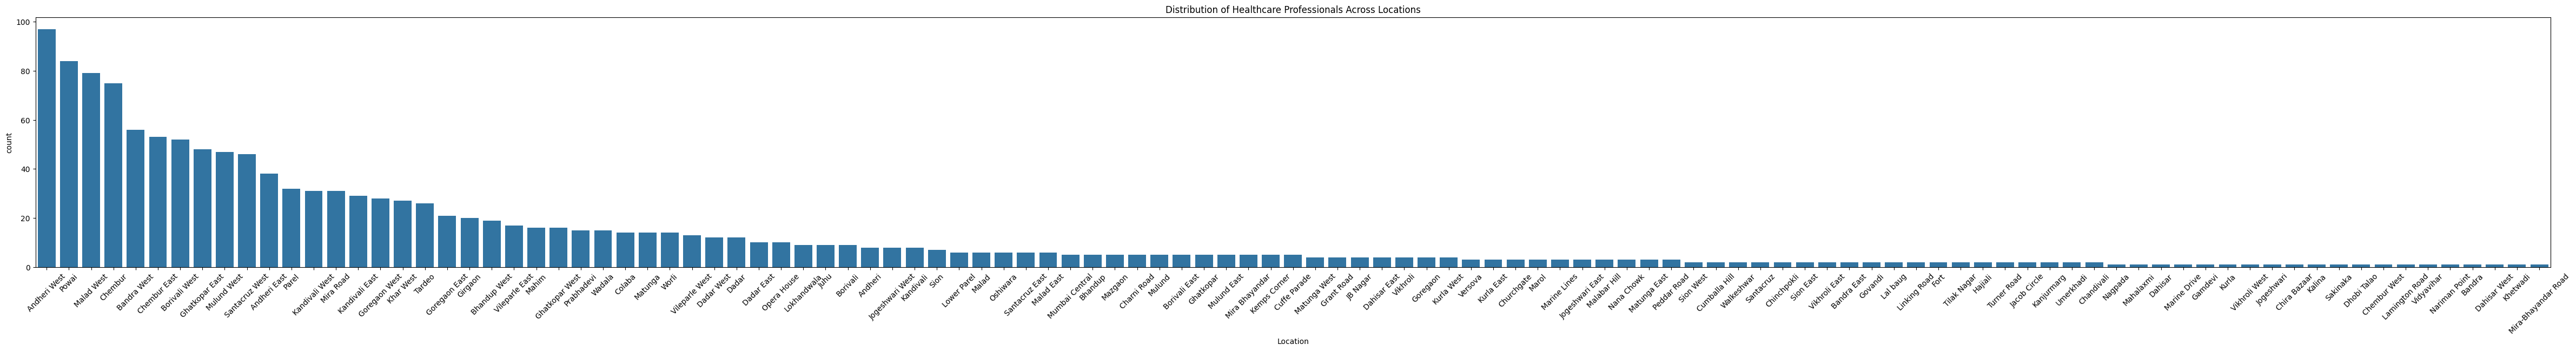

In [155]:
# Geographic Distribution for mumbai
plt.figure(figsize=(60, 6))
sns.countplot(x='Location', data=df_mum, order=df_mum['Location'].value_counts().index)
plt.title('Distribution of Healthcare Professionals Across Locations')
plt.xticks(rotation=45)
plt.show()

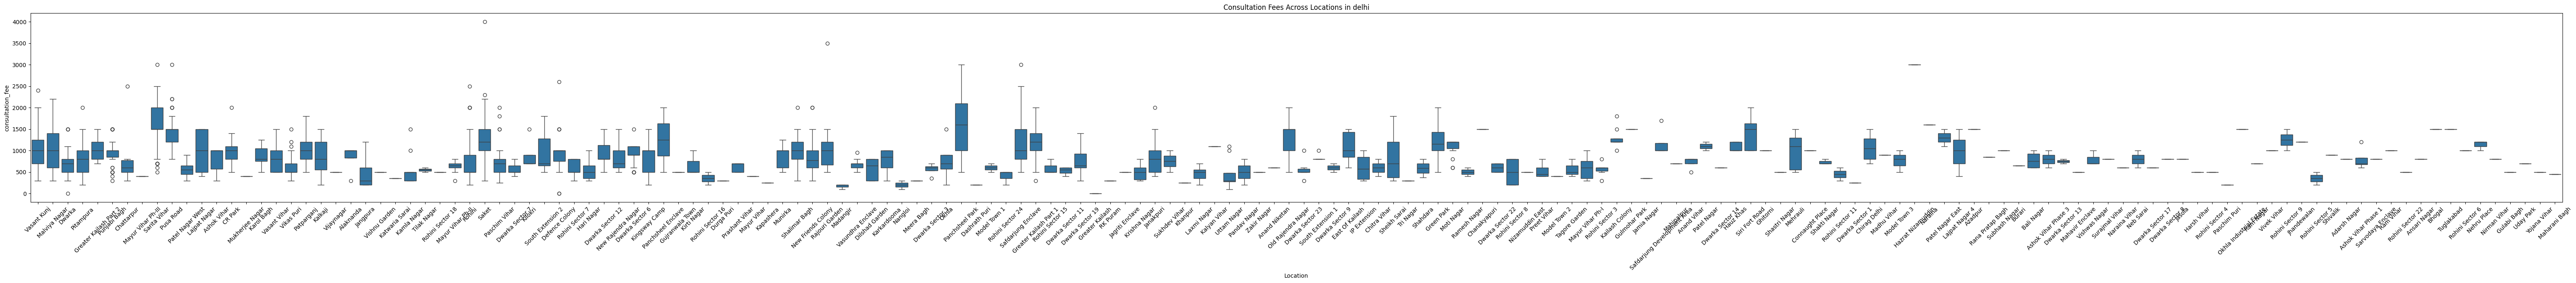

In [156]:
# 3. Consultation Fees by Location in delhi
plt.figure(figsize=(80, 6))
sns.boxplot(x='Location', y='consultation_fee', data=df_del)
plt.title('Consultation Fees Across Locations in delhi')
plt.xticks(rotation=45)
plt.show()

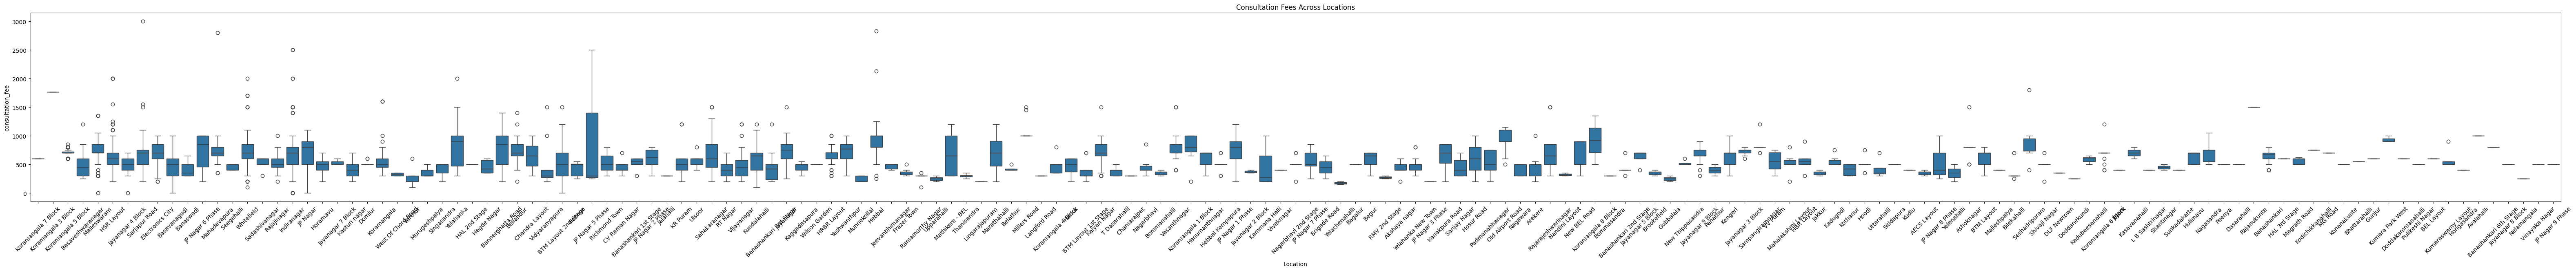

In [157]:
# 3. Consultation Fees by Location i bangalore
plt.figure(figsize=(80, 6))
sns.boxplot(x='Location', y='consultation_fee', data=df_bl)
plt.title('Consultation Fees Across Locations')
plt.xticks(rotation=45)
plt.show()

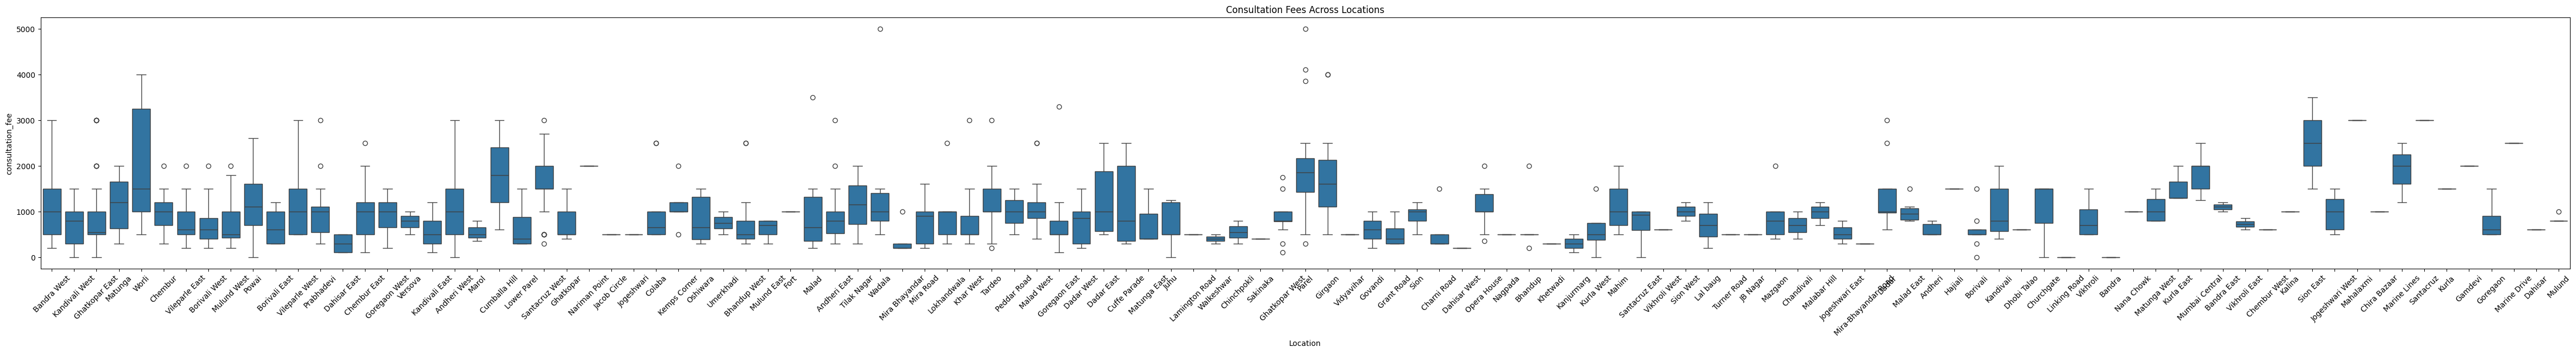

In [158]:
# 3. Consultation Fees by Location in mumbai
plt.figure(figsize=(60, 6))
sns.boxplot(x='Location', y='consultation_fee', data=df_mum)
plt.title('Consultation Fees Across Locations')
plt.xticks(rotation=45)
plt.show()

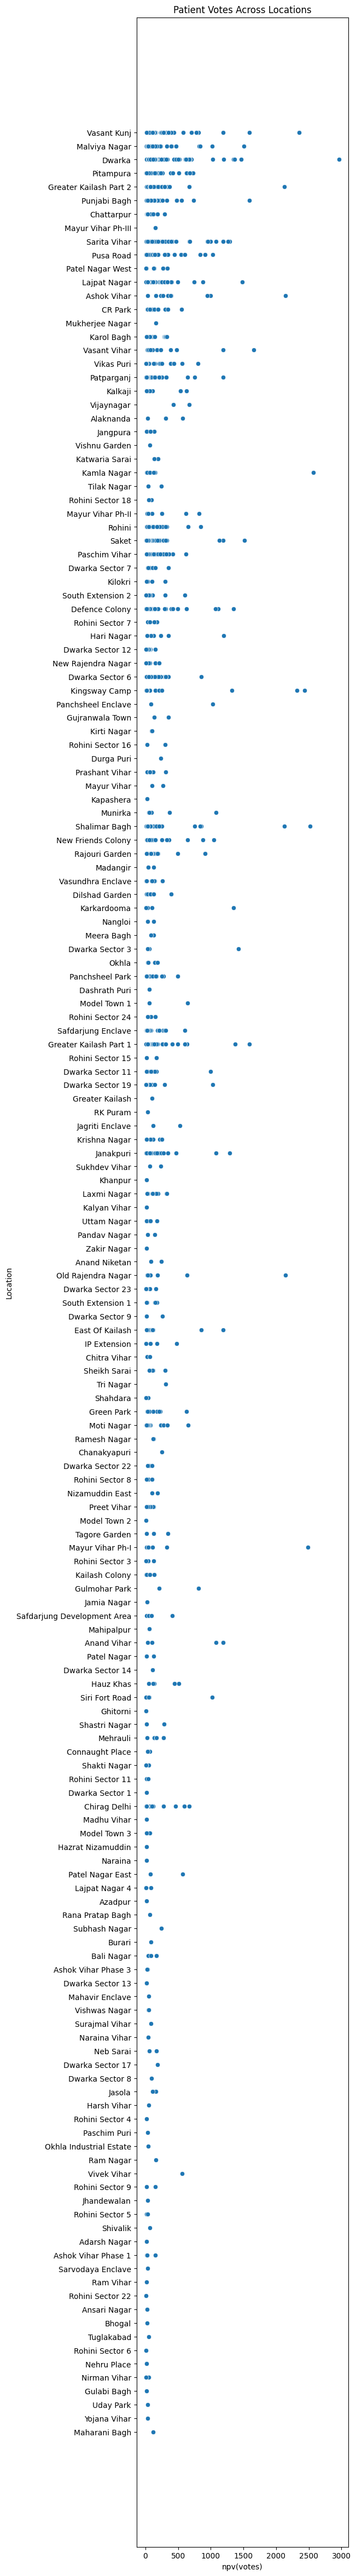

In [159]:
# 7. Patient Votes Analysis for delhi
plt.figure(figsize=(5, 60))
sns.scatterplot(x='npv(votes)', y='Location', data=df_del)
plt.title('Patient Votes Across Locations')
plt.show()

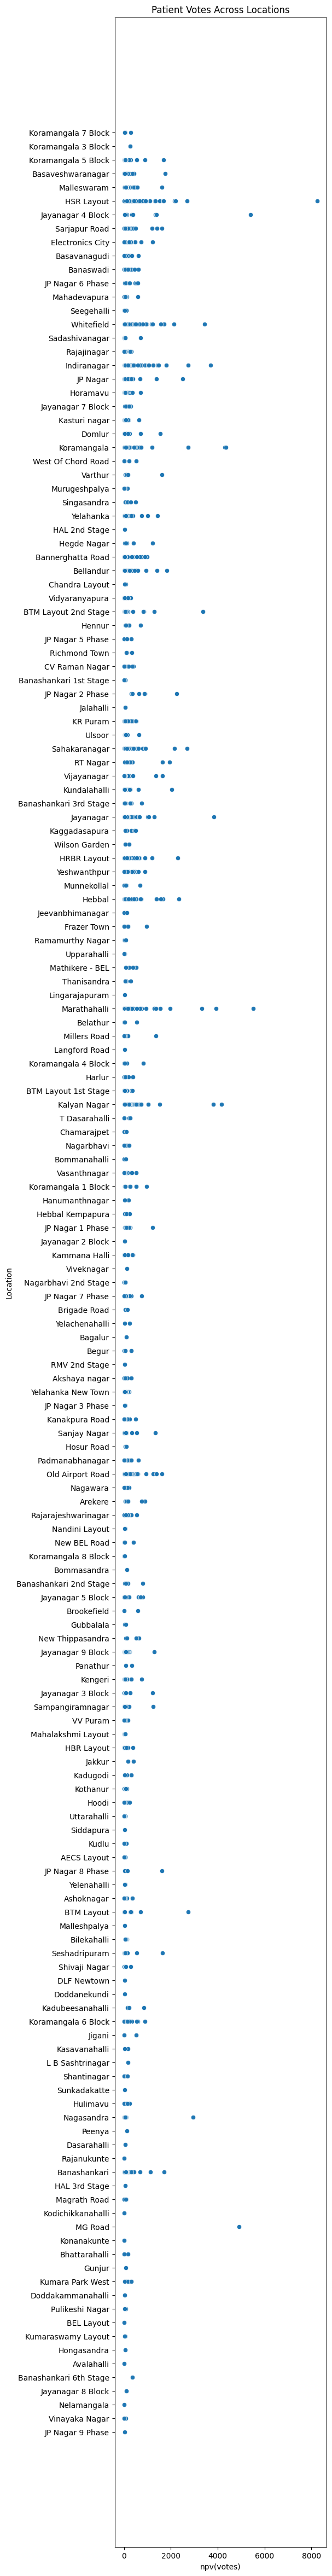

In [160]:
# 7. Patient Votes Analysis for bangalore
plt.figure(figsize=(5, 60))
sns.scatterplot(x='npv(votes)', y='Location', data=df_bl)
plt.title('Patient Votes Across Locations')
plt.show()

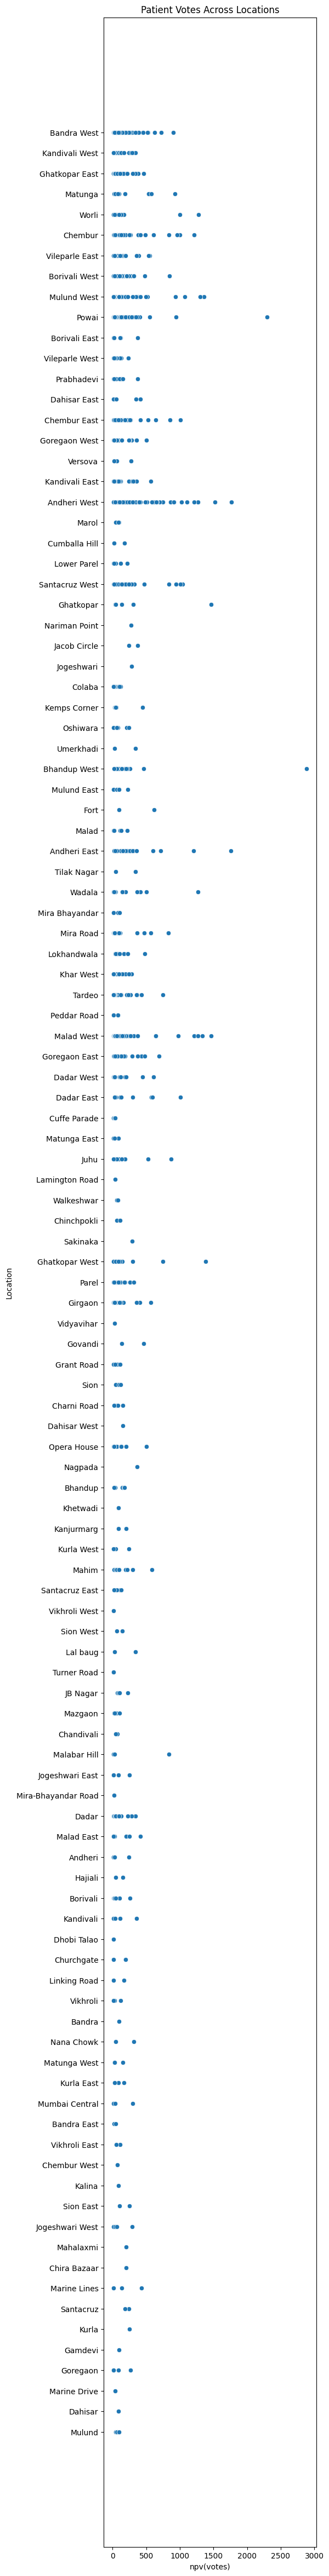

In [161]:
# 7. Patient Votes Analysis for mumbai
plt.figure(figsize=(5, 60))
sns.scatterplot(x='npv(votes)', y='Location', data=df_mum)
plt.title('Patient Votes Across Locations')
plt.show()